In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

forces         = np.array([0   , 1   , 3   , 5   , 7   ])*9.81
muscleB_rest   = 59.5/100.0
muscleB_length = [np.array(0)]*6
muscleB_length[0] = np.array([56.6, 59.4, 61.2, 62.2, 63.2])/100.0
muscleB_length[1] = np.array([53.0, 56.4, 59.5, 61.2, 62.2])/100.0
muscleB_length[2] = np.array([50.2, 51.3, 55.3, 58.5, 60.5])/100.0
muscleB_length[3] = np.array([47.4, 48.6, 51.5, 54.3, 57.2])/100.0
muscleB_length[4] = np.array([46.2, 47.0, 49.1, 51.5, 53.5])/100.0
muscleB_length[5] = np.array([45.1, 45.8, 47.6, 49.4])/100.0 # blew up

In [2]:
muscleB_dx = [np.array(0)]*6
muscleB_strain = np.array([0]*6)
for i in range(6):
    muscleB_dx[i] = np.array([x - muscleB_length[i][0] for x in muscleB_length[i]])
    muscleB_strain[i] = 100.0*(muscleB_rest - muscleB_length[i][0]) / muscleB_rest

stiffnesses = np.array([0]*6)
for i in range(6):
    regression_model = LinearRegression(fit_intercept=False)
    regression_model.fit(muscleB_dx[i].reshape((len(muscleB_dx[i]), 1)), forces[0:len(muscleB_dx[i])])
    stiffnesses[i] = regression_model.coef_[0]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


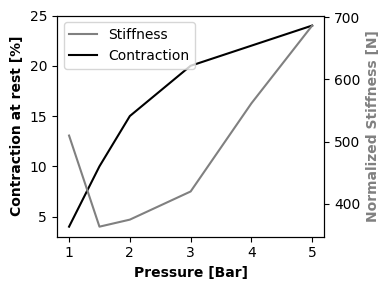

In [3]:
fig, ax1 = plt.subplots(figsize=(4, 3))
color = 'black'

npp = ax1.plot([1, 1.5, 2, 3, 4, 5], muscleB_strain, color=color, label='Contraction')
ax1.set_ylabel('Contraction at rest [%]', fontweight='bold', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xlabel('Pressure [Bar]', fontweight='bold')

ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis
color = 'grey'
ea = ax2.plot([1, 1.5, 2, 3, 4, 5], stiffnesses*muscleB_rest, label="Stiffness", color=color)
ax2.set_ylabel('Normalized Stiffness [N]', fontweight='bold', color=color)


plt.tight_layout()
lns = ea+npp
labs = [l.get_label() for l in lns]
plt.legend(lns, labs)

plt.savefig('../../exports/strain_EA_pressure.eps', format='eps', bbox_inches = 'tight')
plt.show()
fig.tight_layout()  # otherwise the right y-label is slightly clipped

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


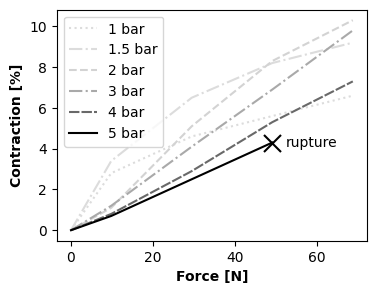

In [57]:
fig, ax1 = plt.subplots(figsize=(4, 3))
ax1.plot(forces, 100.0*muscleB_dx[0], label='1 bar'  , color='gainsboro', linestyle='dotted')
ax1.plot(forces, 100.0*muscleB_dx[1], label='1.5 bar', color='gainsboro', linestyle='dashdot')
ax1.plot(forces, 100.0*muscleB_dx[2], label='2 bar'  , color='lightgray', linestyle='dashed')
ax1.plot(forces, 100.0*muscleB_dx[3], label='3 bar'  , color='darkgray', linestyle='dashdot')
ax1.plot(forces, 100.0*muscleB_dx[4], label='4 bar'  , color='dimgray', linestyle=(0, (5,1)))
ax1.plot(forces[:-1], 100.0*muscleB_dx[5], label='5 bar', color='black', linestyle='solid')
ax1.scatter(forces[-2], 100.0*muscleB_dx[5][3], s=150, c='black', marker='x', clip_on=False)
ax1.annotate('rupture', (forces[-2], 100.0*muscleB_dx[5][3]), textcoords="offset points", xytext=(10,-3))#, ha='center')

ax1.set_ylabel("Contraction [%]", fontweight='bold')
ax1.set_xlabel("Force [N]", fontweight='bold')
plt.legend()


plt.savefig('../../exports/contraction_force.eps', format='eps', bbox_inches = 'tight')
plt.show()
fig.tight_layout() 

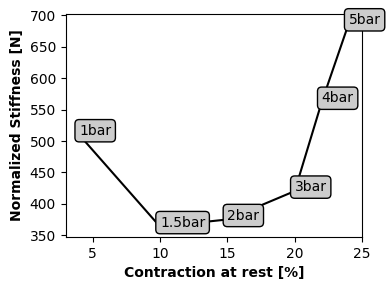

In [79]:
fig, ax1 = plt.subplots(figsize=(4, 3))
color = 'black'

npp = ax1.plot(muscleB_strain, stiffnesses*muscleB_rest, color=color, label='Contraction')
ax1.set_ylabel('Normalized Stiffness [N]', fontweight='bold', color=color)
ax1.tick_params(axis='y', labelcolor=color)

bbox = dict(boxstyle ="round", fc ="0.8") 
for i, pressure in enumerate([1, 1.5, 2, 3, 4, 5]):
    ax1.annotate(f'{pressure}bar', (muscleB_strain[i], stiffnesses[i]*muscleB_rest), textcoords="offset points", xytext=(0,0), bbox=bbox)#, ha='center')
ax1.set_xlabel('Contraction at rest [%]', fontweight='bold')

plt.tight_layout()

#plt.savefig('../../exports/strain_EA_pressure.eps', format='eps', bbox_inches = 'tight')
plt.show()
fig.tight_layout()  # otherwise the right y-label is slightly clipped